## 다변수 확률변수

- 변수가 여러개일 때 분포를 알아보고 연관된 분포 혹은 결과값들을 알아봅시다.
- 변수가 여러개가 되면 확률분포가 결합되어 결합확률분포함수라고 합니다.
- 두 개의 확률변수 값의 결합확률분포를 알고 있을 때 두 개 중에 하나의 확률분포를 알고 있으면 나머지 하나의 확률분포도 알 수 있다.



### 이산 데이터

- X, Y의 확률질량함수
      X확률질량함수 = px(x) 
      Y의 확률질량함수 = px(y)
      결합 확률 질량함수 = pxy(x,y)

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
!pip install koreanize-matplotlib
import koreanize_matplotlib
import numpy as np

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.5 MB 4.5 MB/s 


In [ ]:
import scipy as sp

In [ ]:
# 영어, 수학
grades = ['A','B','C','D','E','F']
scores = pd.DataFrame(
    [
        [1, 2, 1, 0, 0, 0],
     [0, 2, 3, 1, 0, 0],
     [0, 4, 7, 4, 1, 0],
     [0, 1, 4, 5, 4, 0],
     [0, 0, 1, 3, 2, 0],
     [0, 0, 0, 1, 2, 1]
    ],
    columns = grades, index=grades
)
scores.index.name = '수학'
scores.columns.name = '영어'
scores

영어,A,B,C,D,E,F
수학,,,,,,
A,1,2,1,0,0,0
B,0,2,3,1,0,0
C,0,4,7,4,1,0
D,0,1,4,5,4,0
E,0,0,1,3,2,0
F,0,0,0,1,2,1


In [ ]:
scores/scores.values.sum()

영어,A,B,C,D,E,F
수학,,,,,,
A,0.02,0.04,0.02,0.00,0.00,0.00
B,0.00,0.04,0.06,0.02,0.00,0.00
C,0.00,0.08,0.14,0.08,0.02,0.00
D,0.00,0.02,0.08,0.10,0.08,0.00
E,0.00,0.00,0.02,0.06,0.04,0.00
F,0.00,0.00,0.00,0.02,0.04,0.02


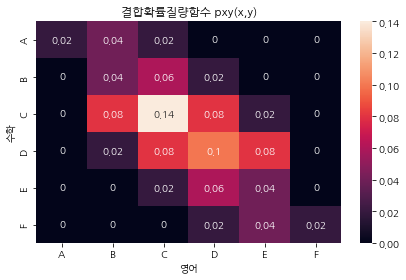

In [ ]:
pmf = scores/scores.values.sum()
sns.heatmap(pmf, annot=True, xticklabels=grades, yticklabels=grades)
plt.title("결합확률질량함수 pxy(x,y)")
plt.tight_layout()
plt.show()

## 주변확률질량함수

결합확률 질량함수에서 단변수 확률질량함수를 구하는 것

$${px}(x) = \Sigma {pxy}(x,{y_i})$$

$${py}(y) = \Sigma {pxy}({x_i},y)$$

In [ ]:
pmf

영어,A,B,C,D,E,F
수학,,,,,,
A,0.02,0.04,0.02,0.00,0.00,0.00
B,0.00,0.04,0.06,0.02,0.00,0.00
C,0.00,0.08,0.14,0.08,0.02,0.00
D,0.00,0.02,0.08,0.10,0.08,0.00
E,0.00,0.00,0.02,0.06,0.04,0.00
F,0.00,0.00,0.00,0.02,0.04,0.02


In [ ]:
pmf.iloc[1,1]

0.04

In [ ]:
# 확률질량함수
x_english = pmf.sum()
x_english

영어
A    0.02
B    0.18
C    0.32
D    0.28
E    0.18
F    0.02
dtype: float64

In [ ]:
y_math = pmf.sum(axis=1)[:,np.newaxis]
y_math

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  """Entry point for launching an IPython kernel.


array([[0.08],
       [0.12],
       [0.32],
       [0.28],
       [0.12],
       [0.08]])

In [ ]:
y_math

array([[0.08],
       [0.12],
       [0.32],
       [0.28],
       [0.12],
       [0.08]])

## 조건부확률질량함수

X,Y 변수 중 하나의 변수가 특정 값으로 고정되는 경우 나머지 하나의 변수의 확률질량함수를 구하는것

$$PX|Y(x|y)=\frac{PXY(x,y)}{PY(y)}$$

$$PY|X(y|x)=\frac{PXY(x,y)}{PX(x)}$$

In [ ]:
import string
string.ascii_uppercase[:6]

'ABCDEF'

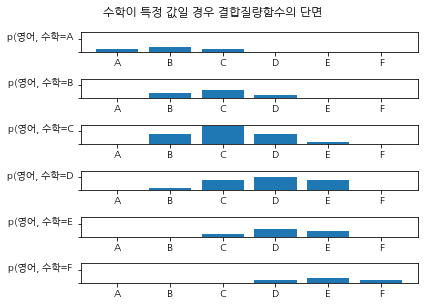

In [ ]:
grades = ['A','B','C','D','E','F']

x = np.arange(6)
for i, y in enumerate(grades):
  ax = plt.subplot(6, 1, i+1)
  ax.tick_params(labelleft=False)
  plt.bar(x, pmf.iloc[i,:])
  plt.ylabel(f'p(영어, 수학={y}', rotation=0, labelpad = 40)
  plt.ylim(0, 0.15)
  plt.xticks(range(6), grades)

plt.suptitle('수학이 특정 값일 경우 결합질량함수의 단면', y = 1.05)
plt.tight_layout()
plt.show()

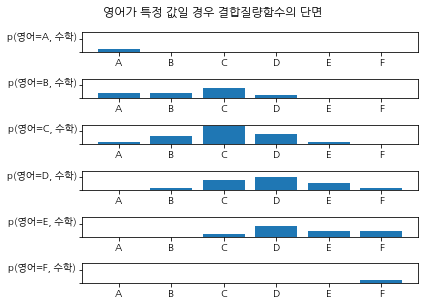

In [ ]:
grades = ['A','B','C','D','E','F']

x = np.arange(6)
for i, y in enumerate(grades):
  ax = plt.subplot(6, 1, i+1)
  ax.tick_params(labelleft=False)
  plt.bar(x, pmf[y])
  plt.ylabel(f'p(영어={y}, 수학)', rotation=0, labelpad = 40)
  plt.ylim(0, 0.15)
  plt.xticks(range(6), grades)

plt.suptitle('영어가 특정 값일 경우 결합질량함수의 단면', y = 1.05)
plt.tight_layout()
plt.show()

## 다변수 연속확률 변수

### 결합누적확률분포함수
이산확률분포처럼 단순사건을 이용할 수 없음(A,B,C,D)   
키, 몸무게, 속도, 시간, 온도   
CDF -> 미분 -> PDF   
결합누적확률분포함수 -> 미분 -> 결합확률밀도함수

$${F_{XY}} = P({X<x, Y<y})$$

- 특성
$${F_{XY}}(-∞, ∞) = 1$$
$${F_{XY}}(-∞, y) = {F_{XY}}(x, ∞) = 0$$

### 결합확률 밀도 함수
결합누적확률분포함수를 미분해서 정의

$${P_{XY}}(x,y)$$

- 특성
      적분하면 1
$$ ∫∫{P_{XY}}(x,y)dxdy = 1 $$


In [ ]:
mu = [70, 170] # 몸무게, 키
cov = [
    [150, 140],
    [140, 300]
]
'''
공분산 행렬 : [
  [분산, 공분산],
  [공분산, 분산]]
]
'''
rv = sp.stats.multivariate_normal(mu, cov)
x, y = np.linspace(20, 120, 100), np.linspace(100, 250, 100)


In [ ]:
xm, ym = np.meshgrid(x, y)
z = rv.pdf(np.dstack([xm, ym]))

In [ ]:
z.sum()

0.6533612360297026

Text(0.5, 1.0, '결합확률밀도함수 P(x,y)')

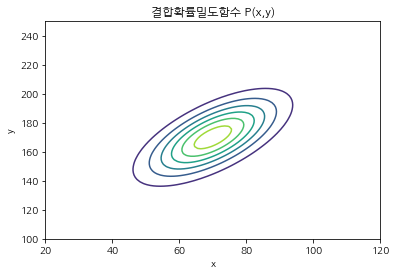

In [ ]:
plt.contour(x, y, z)
plt.xlabel('x')
plt.ylabel('y')
plt.title('결합확률밀도함수 P(x,y)')

### 주변확률밀도함수
- 주변확률밀도 함수는 하나의 변수를 가중평균을 하고 나머지 하나의 변수에 대해서 확률밀도함수를 구하는 것   
- 주변확률밀도함수는 결합확률 밀도 함수를 통해 단일변수의 확률밀도함수를 구하는 것

$${P_X}(x) = ∫{P_{XY}}(x,y)dy$$
$${P_Y}(y) = ∫{P_{XY}}(x,y)dx$$

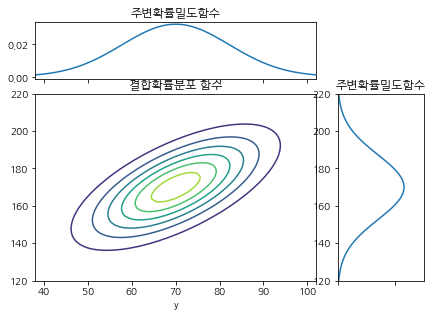

In [ ]:
from matplotlib.ticker import NullFormatter
from matplotlib import transforms
from scipy.integrate import simps

x = np.linspace(20, 120, 100)
y = np.linspace(100, 250, 100)

xm, ym = np.meshgrid(x, y)
rv = sp.stats.multivariate_normal(mu, cov)
z = rv.pdf(np.dstack([xm, ym]))
fx = [simps(z1, y) for z1 in z.T]
fy = [simps(z1, x) for z1 in z]

left, width = 0.1, 0.65
bottom, height = 0.1, 0.65
bottom_h = left_h = left + width + 0.05

rect1 = [left, bottom, width, height]
rect2 = [left, bottom_h, width, 0.2]
rect3 = [left_h, bottom, 0.2, height]

ax1 = plt.axes(rect1)
ax2 = plt.axes(rect2)
ax3 = plt.axes(rect3)

ax2.xaxis.set_major_formatter(NullFormatter())
ax3.xaxis.set_major_formatter(NullFormatter())

ax1.contour(xm, ym, z)
ax1.set_title('결합확률분포 함수')
ax1.set_xlabel('x')
ax1.set_xlabel('y')

ax2.plot(x, fx)
ax2.set_title('주변확률밀도함수')

base = ax3.transData
rot = transforms.Affine2D().rotate_deg(-90)
plt.plot(-y, fy, transform=rot+base)
plt.title('주변확률밀도함수')

ax1.set_xlim(38, 102)
ax2.set_xlim(38, 102)
ax3.set_xlim(0, 0.03)

ax1.set_ylim(120, 220)
ax3.set_ylim(120, 220)

plt.show()

### 조건부 확률 밀도함수
다 변수 확률 변수 중에 하나가 특정한 값일 경우 나머지 확률밀도함수를 조건부 확률 밀도함수

$${P_{X|Y}}(x|y)=\frac{P_{XY}(x,y)}{P_Y(y)}$$

$${P_{Y|X}}(y|x)=\frac{P_{XY}(x,y)}{P_X(x)}$$

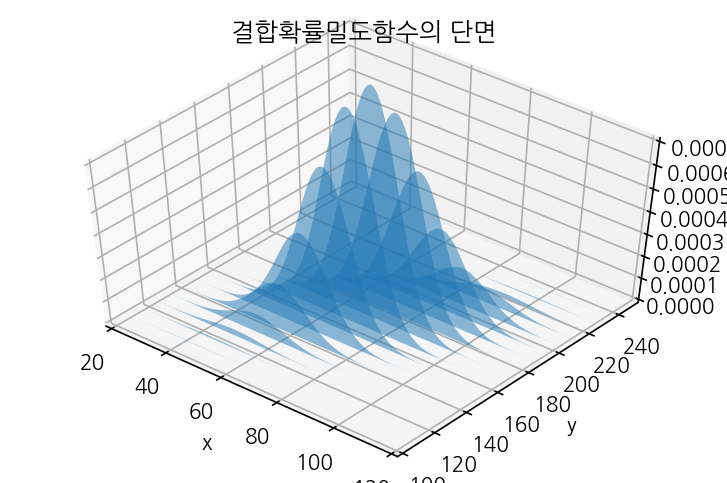

In [ ]:
from matplotlib.collections import PolyCollection
from matplotlib import colors as mcolors

mu = [70, 170] # 몸무게, 키
cov = [
    [150, 140],
    [140, 300]
]

x = np.linspace(20, 120, 100)
y = np.linspace(100, 250, 20)

xm, ym = np.meshgrid(x, y)
rv = sp.stats.multivariate_normal(mu, cov)
z = rv.pdf(np.dstack([xm, ym]))

fig = plt.figure(dpi=150)
ax = fig.gca(projection='3d')

xs = np.hstack([0, x, 0])
zs = np.zeros_like(xs)
verts = []

for i, y1 in enumerate(y):
  zs[1:-1] = z[i]
  verts.append(list(zip(x,zs)))

poly = PolyCollection(verts)
poly.set_alpha(0.5)
ax.add_collection3d(poly, zs=y, zdir='y')

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_xlim(20,120)
ax.set_ylim(100, 250)
ax.set_zlim3d(0,0.0007)
ax.view_init(50,-50)
plt.title('결합확률밀도함수의 단면')
plt.show()

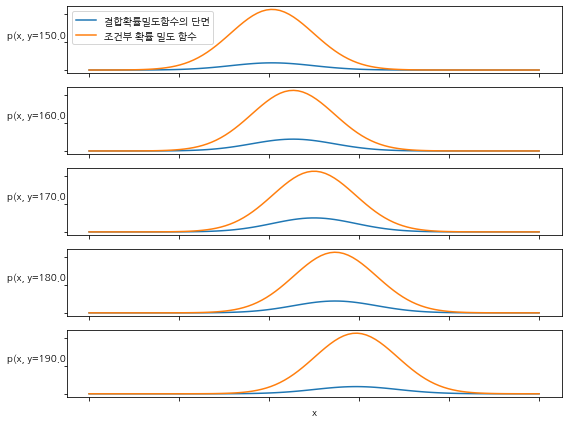

In [ ]:
mu = [70, 170] # 몸무게, 키
cov = [
    [150, 140],
    [140, 300]
]

n = 10
x = np.linspace(20, 120, 100)
y = np.linspace(100, 250, 16)

xm, ym = np.meshgrid(x, y)
rv = sp.stats.multivariate_normal(mu, cov)
z = rv.pdf(np.dstack([xm, ym]))

plt.figure(figsize=(8,6))

for i, j in enumerate(range(5, 10)):
  ax = plt.subplot(5, 1, i+1)
  ax.tick_params(labelleft=False)
  plt.plot(x, z[j,:] * 10 , label = '결합확률밀도함수의 단면')
  density = simps(z[j, :], x)
  plt.plot(x, z[j, :]/density, label = '조건부 확률 밀도 함수')
  ax.xaxis.set_ticklabels([])
  plt.ylabel(f'p(x, y={y[j]}', rotation = 0, labelpad = 30)
  if i ==0:
    plt.legend(loc=2)
plt.xlabel('x')
plt.tight_layout()

## 독립
표본 값이 달라질 때 다른 확률 변수의 조건부 분포가 달라질 때 상관관계가 있다.   
두 확률변수가 상관관계 아니면 서로 독립

$${P_{XY}}(x,y) = {P_X}(x){P_Y}(y)$$

### 조건부 확률분포
독립인 X,Y의 조건부 확률밀도함수는 주변확률밀도함수와 같다.

$${P_{X|Y}}(x|y) = \frac{{P_X}(x){P_Y}(y)}{P_Y(y)} = {P_X(x)}$$
$${P_{Y|X}}(y|x) = \frac{{P_X}(x){P_Y}(y)}{P_X(x)} = {P_Y(y)}$$

In [ ]:
pmf1 = np.array(
    [
     [1, 2, 4, 2, 1],
     [2, 4, 8, 4, 2],
     [4, 8, 16, 8, 4],
     [2, 4, 8, 4, 2],
     [1, 2, 4, 2, 1]
    ]
)
pmf1 = pmf1/pmf1.sum()

In [ ]:
pmf1

array([[0.01, 0.02, 0.04, 0.02, 0.01],
       [0.02, 0.04, 0.08, 0.04, 0.02],
       [0.04, 0.08, 0.16, 0.08, 0.04],
       [0.02, 0.04, 0.08, 0.04, 0.02],
       [0.01, 0.02, 0.04, 0.02, 0.01]])

In [ ]:
pmf_x = pmf1.sum(axis=0)
pmf_y = pmf1.sum(axis=1)

In [ ]:
pmf_x

array([0.1, 0.2, 0.4, 0.2, 0.1])

In [ ]:
pmf_y

array([0.1, 0.2, 0.4, 0.2, 0.1])

In [ ]:
pmf1x = pmf_x * pmf_y[:, np.newaxis]
pmf1x

array([[0.01, 0.02, 0.04, 0.02, 0.01],
       [0.02, 0.04, 0.08, 0.04, 0.02],
       [0.04, 0.08, 0.16, 0.08, 0.04],
       [0.02, 0.04, 0.08, 0.04, 0.02],
       [0.01, 0.02, 0.04, 0.02, 0.01]])

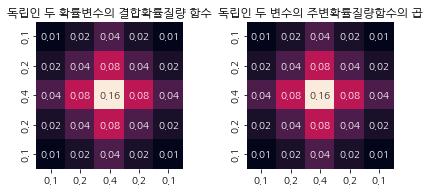

In [ ]:
plt.subplot(121)
sns.heatmap(pmf1, annot=True, square=True, cbar = False, xticklabels=pmf_x, yticklabels=pmf_y)
plt.title('독립인 두 확률변수의 결합확률질량 함수')

plt.subplot(122)
sns.heatmap(pmf1x, annot=True, square=True, cbar = False, xticklabels=pmf_x, yticklabels=pmf_y)
plt.title('독립인 두 변수의 주변확률질량함수의 곱')
plt.tight_layout()
plt.show()

In [ ]:
pmf1[0, :]/pmf_y[0]

array([0.1, 0.2, 0.4, 0.2, 0.1])

상관관계가 있는 두 확률변수